In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import metrics

import math

from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
#資料提取
df=pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
#資料轉型(float->int)
df['Diabetes_012'] = df['Diabetes_012'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')

df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


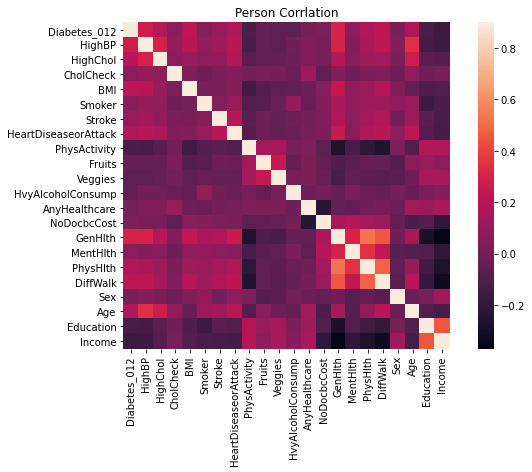

In [5]:
#heatmap correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),vmax=0.9,square=True)
plt.title('Person Corrlation')
plt.show()

In [6]:
#資料分割
X=df.drop('Diabetes_012',axis=1)
y=df['Diabetes_012']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(177576, 21)
(177576,)
(76104, 21)
(76104,)


In [7]:
#random forest
rf=RandomForestClassifier(random_state=1,max_features='sqrt',n_jobs=1,verbose=1).fit(X_train,y_train)
y_pred=rf.predict(X_test)
%time rf.fit(X_train,y_train)
#rf.score(X_test,y_test)

print("Accuracy on train: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test,average='weighted')))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   39.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   40.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 40.4 s
Accuracy on train: 0.994
Accuracy on test: 0.840
F1-score on test set: 0.874


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    9.5s finished


In [8]:
#混淆矩陣
matrix=metrics.confusion_matrix(y_test,y_pred)
print(matrix)
#分類結果
report=metrics.classification_report(y_test,y_pred)
print(report)

[[61833    62  2101]
 [ 1224     2   152]
 [ 8648    11  2071]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     63996
           1       0.03      0.00      0.00      1378
           2       0.48      0.19      0.28     10730

    accuracy                           0.84     76104
   macro avg       0.46      0.39      0.40     76104
weighted avg       0.79      0.84      0.81     76104



In [10]:
k_fold_rf_accuracy = cross_val_score(rf, X, y, cv=10) ##10-fold cross validation
k_fold_rf_f1 = cross_val_score(rf, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation
print(f'Average accuracy after 10 fold cross validation :{k_fold_rf_accuracy.mean().round(2)} +/- {k_fold_rf_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_rf_f1.mean().round(2)} +/- {k_fold_rf_f1.std().round(2)}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

Average accuracy after 10 fold cross validation :0.84 +/- 0.0
Average F1-score after 10 fold cross validation :0.4 +/- 0.0


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.7s finished


In [11]:
#decision tree
dtree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred=dtree.predict(X_test)


print("Accuracy on train: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(accuracy_score(y_pred, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test,average='weighted')))

Accuracy on train: 0.994
Accuracy on test: 0.767
F1-score on test set: 0.762


In [12]:
#混淆矩陣
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[54923  1411  7662]
 [  965    65   348]
 [ 6983   396  3351]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87     63996
           1       0.03      0.05      0.04      1378
           2       0.29      0.31      0.30     10730

    accuracy                           0.77     76104
   macro avg       0.40      0.41      0.40     76104
weighted avg       0.78      0.77      0.77     76104



In [17]:
k_fold_dtree_accuracy = cross_val_score(dtree, X, y, cv=10) ##10-fold cross validation
k_fold_dtree_f1 = cross_val_score(dtree, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation
print(f'Average accuracy after 10 fold cross validation :{k_fold_dtree_accuracy.mean().round(2)} +/- {k_fold_dtree_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation :{k_fold_dtree_f1.mean().round(2)} +/- {k_fold_dtree_f1.std().round(2)}')

Average accuracy after 10 fold cross validation :0.77 +/- 0.0
Average F1-score after 10 fold cross validation :0.4 +/- 0.0


In [18]:
#xgboost
xgb = XGBClassifier(gamma=0).fit(X_train, y_train)
y_pred=xgb.predict(X_test)

print("Accuracy on train: {:.3f}".format(xgb.score(X_train, y_train)))
print("Accuracy on test: {:.3f}".format(xgb.score(X_test, y_test)))
print("F1-score on test set: {:.3f}".format(f1_score(y_pred, y_test,average='weighted')))

C:\Users\88695\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:24:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy on train: 0.862
Accuracy on test: 0.848
F1-score on test set: 0.885


In [19]:
#混淆矩陣
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[62412     1  1583]
 [ 1254     0   124]
 [ 8617     0  2113]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     63996
           1       0.00      0.00      0.00      1378
           2       0.55      0.20      0.29     10730

    accuracy                           0.85     76104
   macro avg       0.47      0.39      0.40     76104
weighted avg       0.80      0.85      0.81     76104



In [20]:
k_fold_xgb_accuracy = cross_val_score(xgb, X, y, cv=10) ##10-fold cross validation
k_fold_xgb_f1 = cross_val_score(xgb, X, y, cv=10, scoring='f1_macro') ##10-fold cross validation
print(f'Average accuracy after 10 fold cross validation : {k_fold_xgb_accuracy.mean().round(2)} +/- {k_fold_xgb_accuracy.std().round(2)}')
print(f'Average F1-score after 10 fold cross validation : {k_fold_xgb_f1.mean().round(2)} +/- {k_fold_xgb_f1.std().round(2)}')

C:\Users\88695\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:25:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:25:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

C:\Users\88695\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:27:54] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:28:15] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:28:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:28:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

In [22]:
all_accuracies = [ k_fold_rf_accuracy.mean().round(2),
                   k_fold_dtree_accuracy.mean().round(2),
                   k_fold_xgb_accuracy.mean().round(2)]

all_accuracies_errors = [k_fold_rf_accuracy.std().round(2),
                   k_fold_dtree_accuracy.std().round(2),
                   k_fold_xgb_accuracy.std().round(2)]

In [23]:
all_f1 = [k_fold_rf_f1.mean().round(2),
                   k_fold_dtree_f1.mean().round(2),
                   k_fold_xgb_f1.mean().round(2)]

all_f1_errors = [  k_fold_rf_f1.std().round(2),
                   k_fold_dtree_f1.std().round(2),
                   k_fold_xgb_f1.std().round(2)]

In [24]:
models=['Decision Tree','Random Forest','XGBoost']
model_data = pd.DataFrame([all_accuracies,all_accuracies_errors,all_f1,all_f1_errors],columns=models, index = ['Accuracy','STD_acc','F1-macro','STD_f1']).T
model_data.style.background_gradient(cmap='coolwarm',axis=0)

,Accuracy,STD_acc,F1-macro,STD_f1
Decision Tree,0.840000,0.000000,0.400000,0.000000
Random Forest,0.770000,0.000000,0.400000,0.000000
XGBoost,0.850000,0.000000,0.400000,0.000000


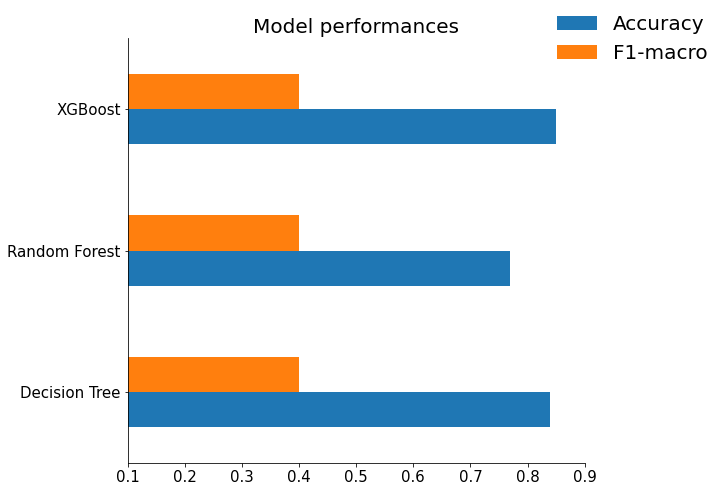

In [26]:
model_data[['Accuracy','F1-macro']].plot.barh(figsize=(10,7))
plt.legend(frameon=False,bbox_to_anchor=(0.9,0.9), prop={'size':20})
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlim([0.1,0.9]);
plt.title('Model performances',size=20)
sns.despine(top=True)
plt.tight_layout()
plt.savefig('model-comparision.png',dpi=300)